# Comparing different datasets, sample level

- This notebook is focusing on comparing surface marker expression between NK cells and B cells


Used NK cell markers are selected based on recent papers and documentation of Mustjoki group; 

- Pfefferle, A., et al. (2019). A Temporal Transcriptional Map of Human Natural Killer Cell Differentiation. BioRxiv, 630657. https://doi.org/10.1101/630657
- Melsen, J. E., et al. (2022). Single-cell transcriptomics in bone marrow delineates CD56dimGranzymeK+ subset as intermediate stage in NK cell differentiation. Frontiers in immunology, 13, 1044398. https://doi.org/10.3389/fimmu.2022.1044398
- Yang, C., et al.(2019). Heterogeneity of human bone marrow and blood natural killer cells defined by single-cell transcriptome. Nature communications, 10(1), 3931. https://doi.org/10.1038/s41467-019-11947-7




Datasets:

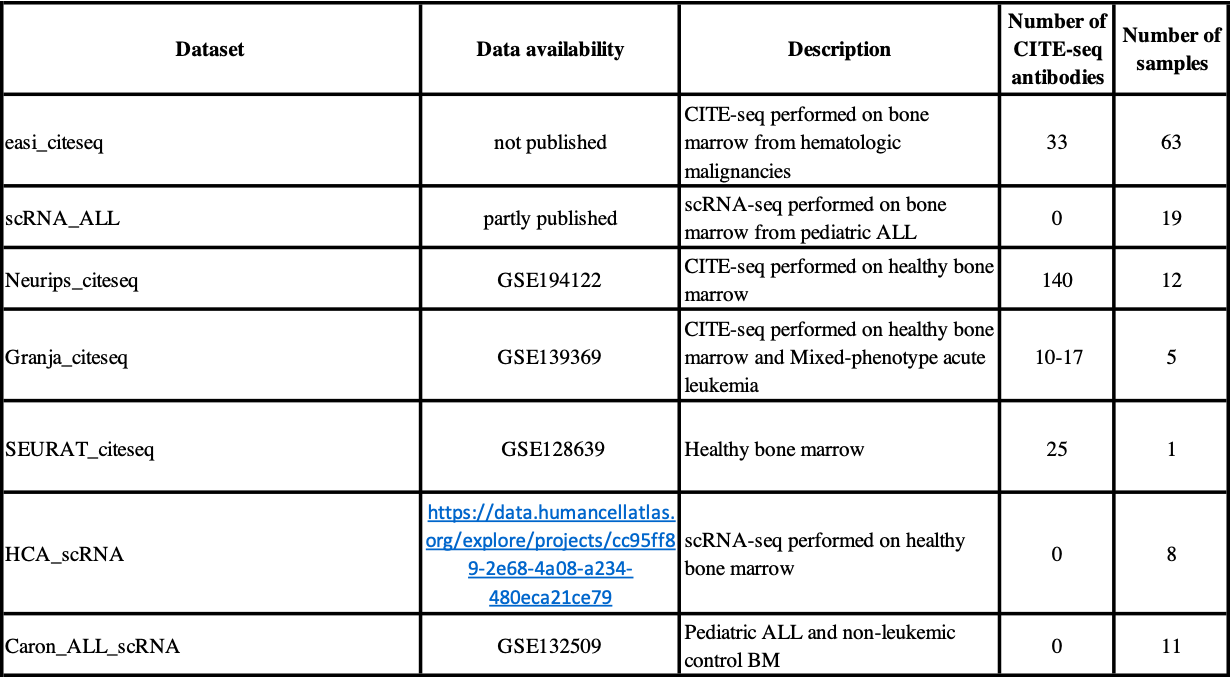

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
import scvi
import scanpy as sc
import umap

from ridgeplot import ridgeplot

import warnings

warnings.filterwarnings('ignore')



Global seed set to 0
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


## File preparations

### Neurips

In [3]:
#Neurips

adata= sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/AML_norm.h5ad')

In [4]:
adata

AnnData object with n_obs × n_vars = 26365 × 7277
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group', 'batch', 'CD19', 'CD10', 'CD20', 'CD3', 'CD2_prot', 'CD11b', 'HLADR', 'CD38_prot', 'CD11c', 'CD7', 'CD45', 'CD33', 'CD81', 'CD73', 'CD123', 'CD14', 'CD45RA', 'CD45RO', 'CD4', 'CD8a', 'CD197', 'CD127', 'CD56', 'CD5', 'CD15', 'CD64', 'CD117', 'CD24', 'CD44_prot', 'CD58', 'CD66ace', 'CD13', 'CD34_prot', 'leiden_1'
    var: 'gene_ids', 'feature_types', 'n_cells-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'n_cells-10', 'highly_variable-10', 'means-10', 'dispersions-10', '

In [6]:
#selecting only NK cells (=cluster 9), identified in earlier notebook

adata_nk = adata[adata.obs['leiden_1'] == "9"]

In [7]:
adata_nk

View of AnnData object with n_obs × n_vars = 1383 × 7277
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group', 'batch', 'CD19', 'CD10', 'CD20', 'CD3', 'CD2_prot', 'CD11b', 'HLADR', 'CD38_prot', 'CD11c', 'CD7', 'CD45', 'CD33', 'CD81', 'CD73', 'CD123', 'CD14', 'CD45RA', 'CD45RO', 'CD4', 'CD8a', 'CD197', 'CD127', 'CD56', 'CD5', 'CD15', 'CD64', 'CD117', 'CD24', 'CD44_prot', 'CD58', 'CD66ace', 'CD13', 'CD34_prot', 'leiden_1'
    var: 'gene_ids', 'feature_types', 'n_cells-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'n_cells-10', 'highly_variable-10', 'means-10', 'dispersions

In [8]:
#NK cell cluster contained small amount of cell annotated as "not NK cells", so these cells are removed


adata_nk = adata_nk[adata_nk.obs['cell_type'] == "NKT"]

adata_nk

View of AnnData object with n_obs × n_vars = 1378 × 7277
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group', 'batch', 'CD19', 'CD10', 'CD20', 'CD3', 'CD2_prot', 'CD11b', 'HLADR', 'CD38_prot', 'CD11c', 'CD7', 'CD45', 'CD33', 'CD81', 'CD73', 'CD123', 'CD14', 'CD45RA', 'CD45RO', 'CD4', 'CD8a', 'CD197', 'CD127', 'CD56', 'CD5', 'CD15', 'CD64', 'CD117', 'CD24', 'CD44_prot', 'CD58', 'CD66ace', 'CD13', 'CD34_prot', 'leiden_1'
    var: 'gene_ids', 'feature_types', 'n_cells-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'n_cells-10', 'highly_variable-10', 'means-10', 'dispersions

## Comparisons

In [15]:
#NK cell markers (Reference 1)

nk_immature = ['CD56']
nk_activating= ['CD335', 'CD314', 'CD2', 'CD226']
nk_maturation= ['CD57']
nk_inhibitory= ['CD158e1']

nk_mustjoki = [nk_immature, nk_activating, nk_maturation, nk_inhibitory]
nk_mustjoki = list(np.concatenate(nk_mustjoki).flat)


In [16]:
#NK cell markers (Reference 2) used in Neurips antibody panel

nk_immature_pfef = ['CD56']
nk56dim = ['CD94','CD158b', 'CD57']

# nk_adaptive =['CD158b', 'CD159c, CD57'] CD159c not used in Neurips, so this is same as previous

nk_transition= ['TIGIT', 'CD155', 'CD226', 'CD161'] 

c1_pfef = ['CD195', 'CD122', 'CD94']
c2_pfef = ['CD62L', 'CD127', 'CD27', 'TIGIT']
c3_pfef = ['CD16', 'CD38']

pseudotime= ['CD161', 'CD94', 'CD56', 'CD5', 'CD7', 'CD122']


#bigger list including all markers

nk_pfef=[nk56dim, nk_transition, c1_pfef, c2_pfef, c3_pfef, pseudotime]
nk_pfef = list(np.concatenate(nk_pfef).flat)

In [17]:
# Reference 3, Melsen et al. 

cd56bright_mels_prot= ['CD56', "CD2"]
cd56dim_mels_1_prot = ['CD16']
cd56dim_mels_2_prot  = ['CD62L'] 
red_eff_mels_prot = ['CD16']
clust3_mels_prot = ['CD34']

nk_melsen = [cd56bright_mels_prot, cd56dim_mels_1_prot,cd56dim_mels_2_prot,red_eff_mels_prot, clust3_mels_prot]
nk_melsen = list(np.concatenate(nk_melsen).flat)

In [18]:
# Reference 4, Yang et al. 

is_nk_yang_prot = ['CD94','CD56'] 
inflamed_nk_prot = ['CD69']
active_nk_prot = ["CD69"]
maturation_prot = ['CD62L', 'CD57'] 
adaptive_high_prot = ['CD52']
mature_prot = ['CD57']
terminal_prot = ['CX3CR1']

nk_yang = [is_nk_yang_prot,inflamed_nk_prot,active_nk_prot,maturation_prot,adaptive_high_prot,mature_prot,terminal_prot]

nk_yang = list(np.concatenate(nk_yang).flat)

In [19]:
#markers from all references

nk_all = [nk_mustjoki, nk_pfef, nk_melsen, nk_yang]
nk_all = list(np.concatenate(nk_all).flat)

In [20]:
#remove duplicates
nk_all = list(set(nk_all))

In [21]:
#check which markers were used in Neurips

listOfmarkers= nk_all

nk_neu = []

for x in listOfmarkers:
    if x in adata_nk.obsm['protein_expression_dsb'].columns:
        nk_neu.append(x)



In [22]:
nk_neu

['CD2', 'CD5', 'CD127', 'CD7', 'CD34', 'CD38', 'CD56']

### Comparing to B cells

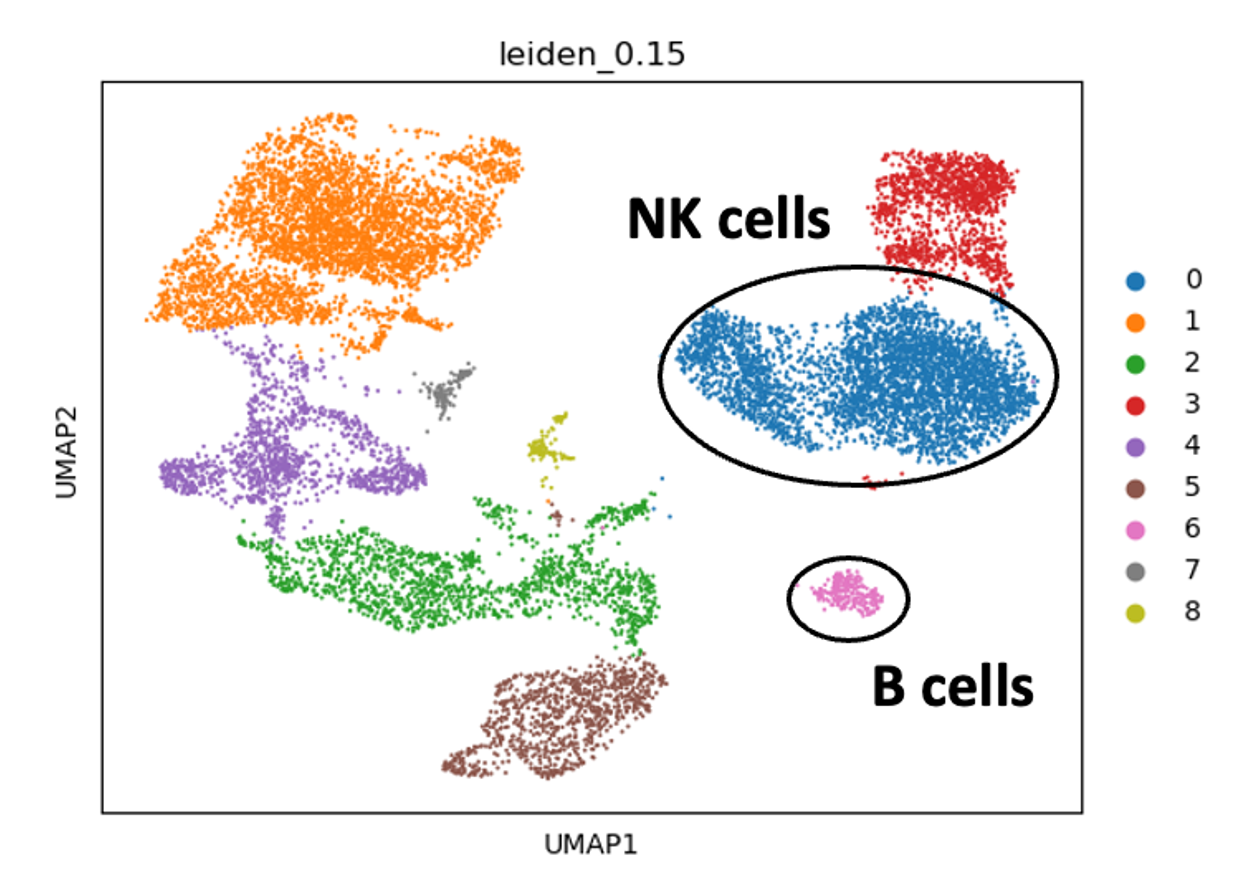

B cells were selected for comparisons, since these cells are not expected to express same surface markers as NK cells at high levels. Additionally, size of the B and NK cells is comparable. Based on leiden clustering (resolution 0.15) and marker/protein analysis ("easi_nk_MDS_clustering" -notebook), cluster 6 represents B cells and cluster 0 NK cells

In [9]:
#Sample names
samples=adata_nk.obs['POOL'].unique().tolist()

samples

['EG37',
 'EG44',
 'EG45',
 'EG48',
 'EG49',
 'EG50',
 'EG51',
 'EG52',
 'EG53',
 'EG59',
 'EG61',
 'EG62',
 'EG63']

## DSB

In [23]:
#saving protein expression in NK cells into a list

list_prot_nk=[]

for sample in samples:
    eg=adata[(adata.obs['leiden_1'] ==  "9")]
    eg1=eg[eg.obs['POOL'] == sample]
    prot=eg1.obsm['protein_expression_dsb']
    prot_marker=prot[nk_neu]
    list_prot_nk.append(prot_marker)
    

In [24]:
#Adding cell type information after sample name

string= "NK cells"

samples_nk = [string for x in samples]

In [25]:
#Adding sample names

list_adata_nk=[]

for i in range(len(list_prot_nk)):
    sample= list_prot_nk[i]
    sample["Cell type"]=samples_nk[i]
    list_adata_nk.append(sample)
    
#creating df

df_nk=pd.concat(list_adata_nk, axis=0)

In [27]:
#selecting B cells

adata_b=adata[adata.obs['leiden_1'] == '19']

In [29]:
#saving protein counts in B cells into a list

list_prot_b=[]

for sample in samples:
    eg=adata[adata.obs['leiden_1'] == '19']
    eg1=eg[eg.obs['POOL'] == sample]
    prot=eg1.obsm['protein_expression_dsb']
    prot_marker=prot[nk_neu]
    list_prot_b.append(prot_marker)

In [30]:
#Adding cell type information to sample names

string= "B cells"

samples_b = [string for x in samples]

In [31]:
#Adding sample names

list_adata_b=[]

for i in range(len(list_prot_b)):
    sample= list_prot_b[i]
    sample["Cell type"]=samples_b[i]
    list_adata_b.append(sample)
    
#creating df
    
df_b=pd.concat(list_adata_b, axis=0)

In [38]:
#NK cells

df_nk.shape

(1383, 8)

In [39]:
#B cells

df_b.shape

(409, 8)

In [40]:
df=pd.concat([df_nk, df_b], axis=0)

df.shape

(1792, 8)

In [34]:
samples_b

['B cells',
 'B cells',
 'B cells',
 'B cells',
 'B cells',
 'B cells',
 'B cells',
 'B cells',
 'B cells',
 'B cells',
 'B cells',
 'B cells',
 'B cells']

In [28]:
#Assigning sample pairs (one sample, B + NK cells)

#data1 = df[(df['Sample'] == "EG54 NK cells") | (df['Sample'] == 'EG54 B cells')].assign(Samplepair= 1)   
#data2 = df[(df['Sample'] == "EG55 NK cells") | (df['Sample'] == 'EG55 B cells')].assign(Samplepair= 2)   
#data3 = df[(df['Sample'] == "EG56 NK cells") | (df['Sample'] == 'EG56 B cells')].assign(Samplepair= 3)   
#data4 = df[(df['Sample'] == "EG57 NK cells") | (df['Sample'] == 'EG57 B cells')].assign(Samplepair= 4)   
#data5 = df[(df['Sample'] == "EG58 NK cells") | (df['Sample'] == 'EG58 B cells')].assign(Samplepair= 5)   


In [29]:
#df from assigned sample pairs

#cdf = pd.concat([data1, data2, data3, data4, data5])


In [30]:
nk_neu

['CD38', 'CD127', 'CD56', 'CD5', 'CD34', 'CD7', 'CD2']

In [41]:
df

,CD2,CD5,CD127,CD7,CD34,CD38,CD56,Cell type
AAGGAGCAGCGCTTAT-1-117,7.846327,1.776049,0.362640,3.937683,0.629788,-1.136135,0.109653,NK cells
ACATCAGTCAAGGTAA-1-117,5.069321,3.455129,2.462119,2.208673,3.262141,2.487240,2.028690,NK cells
ACCTTTAAGTCCGTAT-1-117,1.612314,3.455129,2.462119,2.846473,1.469260,1.662390,1.641721,NK cells
AGACGTTAGATGGGTC-1-117,10.099739,3.332249,0.362640,7.612757,0.321698,1.436317,0.615840,NK cells
AGTAGTCTCAGGTAAA-1-117,7.001781,3.693390,-0.166408,7.612757,-4.166403,-1.136135,-4.246398,NK cells
...,...,...,...,...,...,...,...,...
CACCTTGGTTCGGCAC-1-139,0.433166,0.974129,0.971854,-2.165120,0.638485,0.603694,0.170202,B cells
CGAGCACCAAGCGAGT-1-139,-0.423518,1.192116,0.377211,-0.199973,0.952569,2.108864,1.044310,B cells
TTTGCGCAGATAGGAG-1-139,-1.161376,2.351185,0.055973,0.208944,0.306943,0.603694,-1.461092,B cells
ACGATACGTAGCTAAA-1-130,-0.197135,-0.837549,-0.283632,0.955220,-1.024381,1.550253,0.401682,B cells


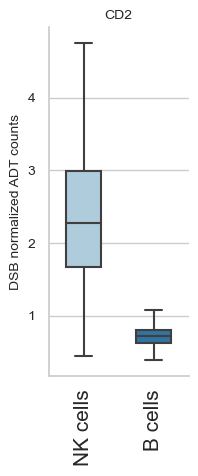

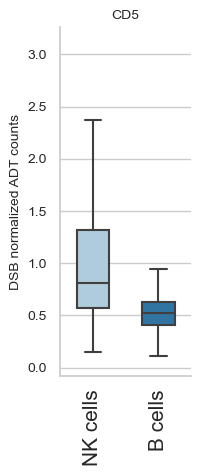

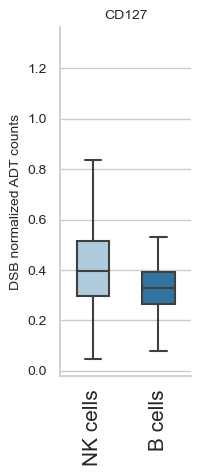

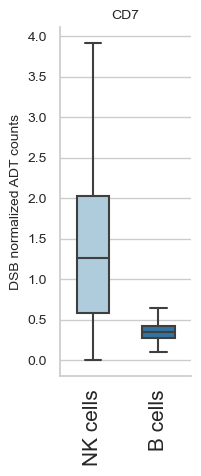

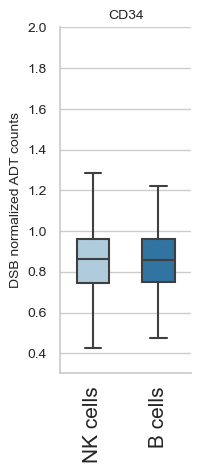

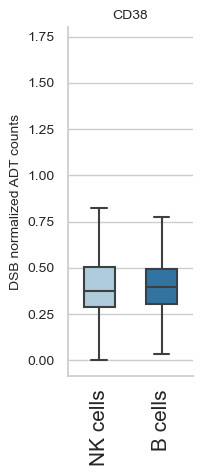

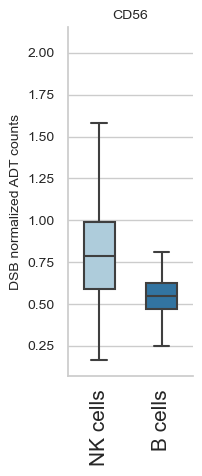

In [62]:
for prot in df[df.columns[:-1]]:
    sns.set_theme(style = "whitegrid", font_scale= 0.7)
    ax=sns.catplot(x="Cell type", y=prot, hue="Cell type",
            aspect=.4,fliersize=0,dodge=False, 
            kind="box",palette = 'Paired', data=df,
            width = 0.5)
    ax.fig.set_size_inches(2, 4)
    ax.set_xticklabels(rotation = 90)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=10)
    ax.set(xlabel=None)
    ax.set_ylabels('DSB normalized ADT counts', fontsize= 10)
    #sns.move_legend(ax, "upper right", bbox_to_anchor=(.85, .9), title='Sample pairs')
    plt.title(prot, fontsize=10)

    # title
    #new_title = 'Sample'
    #ax._legend.set_title(new_title)
    # replace labels
    #new_labels = ['EG54', 'EG55', 'EG56', 'EG57', 'EG58']
    #for t, l in zip(ax._legend.texts, new_labels):
     #   t.set_text(l)

- DSB normalized surface protein counts of NK and B cells from each sample are plotted above. 


In [33]:
#CD56

#sns.set_theme(style = "whitegrid", font_scale= 0.7)
#ax=sns.catplot(x="Sample", y="CD56", hue="Samplepair",
#            aspect=.3,fliersize=0,dodge=False, 
#            kind="box",palette = 'Paired', data=cdf,
#            legend = "CD56", width = 0.5)
#ax.fig.set_size_inches(7, 4)
#ax.set_xticklabels(rotation = 90)
#ax.tick_params(axis='x', labelsize=10)
#ax.tick_params(axis='y', labelsize=10)
#ax.set(xlabel=None)
#ax.set_ylabels('DSB normalized protein counts', fontsize= 10)
#sns.move_legend(ax, "upper right", bbox_to_anchor=(.85, .9), title='Sample pairs')
#plt.title("CD56", fontsize=10)
#
## title
#new_title = 'Sample'
#ax._legend.set_title(new_title)
## replace labels
#new_labels = ['EG34', 'EG35', 'EG36']
#for t, l in zip(ax._legend.texts, new_labels):
#    t.set_text(l)
#
#plt.show()
#
##CD7
#
#sns.set_theme(style = "whitegrid", font_scale= 0.7)
#ax=sns.catplot(x="Sample", y="CD7", hue="Samplepair",
#            aspect=.3,fliersize=0,dodge=False, 
#            kind="box",palette = 'Paired', data=cdf,
#            legend = "CD7", width = 0.5)
#ax.fig.set_size_inches(7, 4)
#ax.set_xticklabels(rotation = 90)
#ax.tick_params(axis='x', labelsize=10)
#ax.tick_params(axis='y', labelsize=10)
#ax.set(xlabel=None)
#ax.set_ylabels('DSB normalized protein counts', fontsize= 10)
#sns.move_legend(ax, "upper right", bbox_to_anchor=(.85, .9), title='Sample pairs')
#plt.title("CD7", fontsize=10)
#
## title
#new_title = 'Sample'
#ax._legend.set_title(new_title)
## replace labels
#new_labels = ['EG54', 'EG55', 'EG56', 'EG57', 'EG58']
#for t, l in zip(ax._legend.texts, new_labels):
#    t.set_text(l)

#plt.show()




## CLR

In [45]:
#saving protein expression in NK cells into a list

list_prot_nk=[]

for sample in samples:
    eg=adata[(adata.obs['leiden_1'] ==  "9")]
    eg1=eg[eg.obs['POOL'] == sample]
    prot=eg1.obsm['protein_expression_clr']
    prot_marker=prot[nk_neu]
    list_prot_nk.append(prot_marker)
    

In [46]:
#Adding cell type information after sample name

string= "NK cells"

samples_nk = [string for x in samples]

In [47]:
#Adding sample names

list_adata_nk=[]

for i in range(len(list_prot_nk)):
    sample= list_prot_nk[i]
    sample["Cell type"]=samples_nk[i]
    list_adata_nk.append(sample)
    

In [48]:
#creating df

df_nk=pd.concat(list_adata_nk, axis=0)

In [49]:
#selecting B cells

adata_b=adata[adata.obs['leiden_1'] == '19']

In [51]:
#saving protein counts in B cells into a list

list_prot_b=[]

for sample in samples:
    eg=adata[adata.obs['leiden_1'] == '19']
    eg1=eg[eg.obs['POOL'] == sample]
    prot=eg1.obsm['protein_expression_clr']
    prot_marker=prot[nk_neu]
    list_prot_b.append(prot_marker)

In [52]:
#Adding cell type information to sample names

string= "B cells"

samples_b = [string for x in samples]

In [53]:
#Adding sample names

list_adata_b=[]

for i in range(len(list_prot_b)):
    sample= list_prot_b[i]
    sample["Cell type"]=samples_b[i]
    list_adata_b.append(sample)

In [54]:
    
#creating df
    
df_b=pd.concat(list_adata_b, axis=0)

In [55]:
#NK cells

df_nk.shape

(1383, 8)

In [56]:
#B cells

df_b.shape

(409, 8)

In [57]:
df=pd.concat([df_nk, df_b], axis=0)

In [58]:
df.shape

(1792, 8)

In [60]:
#data1 = df[(df['Sample'] == "EG54 NK cells") | (df['Sample'] == 'EG54 B cells')].assign(Samplepair= 1)   
#data2 = df[(df['Sample'] == "EG55 NK cells") | (df['Sample'] == 'EG55 B cells')].assign(Samplepair= 2)   
#data3 = df[(df['Sample'] == "EG56 NK cells") | (df['Sample'] == 'EG56 B cells')].assign(Samplepair= 3)   
#data4 = df[(df['Sample'] == "EG57 NK cells") | (df['Sample'] == 'EG57 B cells')].assign(Samplepair= 4)   
#data5 = df[(df['Sample'] == "EG58 NK cells") | (df['Sample'] == 'EG58 B cells')].assign(Samplepair= 5)   

In [49]:
#df from assigned sample pairs

#cdf = pd.concat([data1, data2, data3, data4, data5])


#cdf

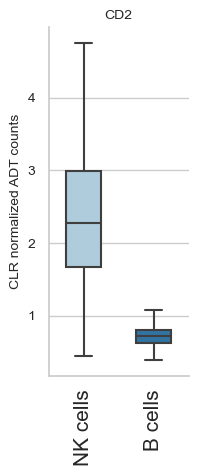

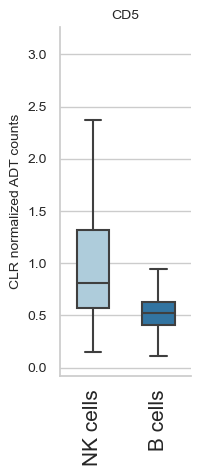

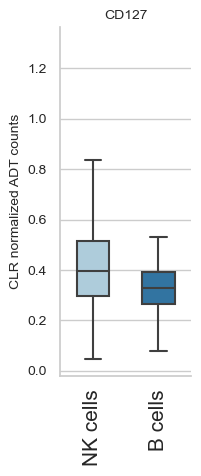

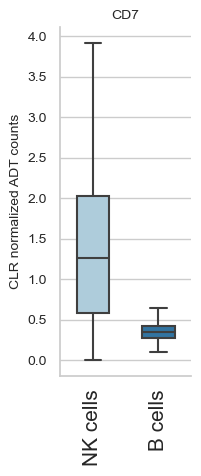

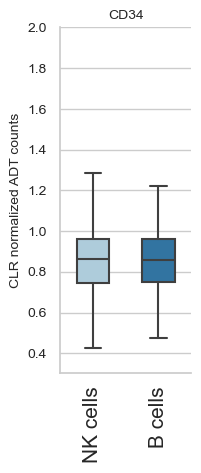

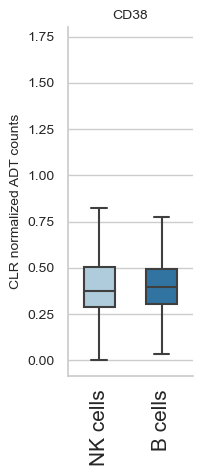

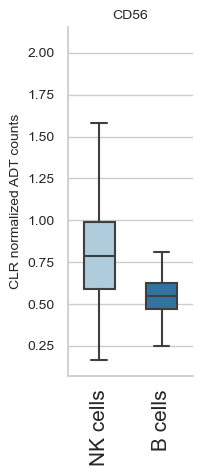

In [63]:
for prot in df[df.columns[:-1]]:
    sns.set_theme(style = "whitegrid", font_scale= 0.7)
    ax=sns.catplot(x="Cell type", y=prot, hue="Cell type",
            aspect=.4,fliersize=0,dodge=False, 
            kind="box",palette = 'Paired', data=df,
            width = 0.5)
    ax.fig.set_size_inches(2, 4)
    ax.set_xticklabels(rotation = 90)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=10)
    ax.set(xlabel=None)
    ax.set_ylabels('CLR normalized ADT counts', fontsize= 10)
    #sns.move_legend(ax, "upper right", bbox_to_anchor=(.85, .9), title='Sample pairs')
    plt.title(prot, fontsize=10)

    # title
    #new_title = 'Sample'
    #ax._legend.set_title(new_title)
    # replace labels
    #new_labels = ['EG54', 'EG55', 'EG56', 'EG57', 'EG58']
    #for t, l in zip(ax._legend.texts, new_labels):
    #    t.set_text(l)

- Results...